# Классификация

In [41]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Загрузите данные о диагностике сахарного диабета;
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

In [7]:
data.nunique()  # количество уникальных значений

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [34]:
# Разделите эти данные на тестовую и обучающую выборки
from sklearn.model_selection import train_test_split
X, y = data.iloc[:, 0:8], data.iloc[:, 8]
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [38]:
# Постройте модель логистической регрессии для предсказания заболевания
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
model = LogisticRegression()
model.fit(X_train, y_train)
# print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [130]:
# Оцените качество модели на тестовой выборке с помощью следующих метрик
from sklearn import metrics

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
acc1 = metrics.accuracy_score(y_test, predicted)
prec1 = metrics.precision_score(y_test, predicted, average= None)
rec1 = metrics.recall_score(y_test, predicted, average= None)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       121
           1       0.77      0.61      0.68        71

    accuracy                           0.79       192
   macro avg       0.78      0.75      0.76       192
weighted avg       0.78      0.79      0.78       192

[[108  13]
 [ 28  43]]


accuracy - 0.79 (точность модели в целом)

precision: для первого класса - 0.79, для второго класса - 0.77 (доля объектов реального данного класса, которая была отнесена к этому классу (есть ли лишние элементы из других классов))
    
recall: для первого класса - 0.89, для второго класса - 0.61 (доля объектов данного класса было опознанно правильно)

Модель имеет довольно неплохие показатели точности, следовательно, она ПРИМЕНИМА 

In [78]:
# Функция для кривой обучения
from sklearn.model_selection import learning_curve
def plot_learning_curve (estimator, X, y):
    plt.figure()
    plt.title(title)
    # if ylim is not None:
    #     plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training set")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Estimated set")

    plt.legend(loc="best")
    plt.show()

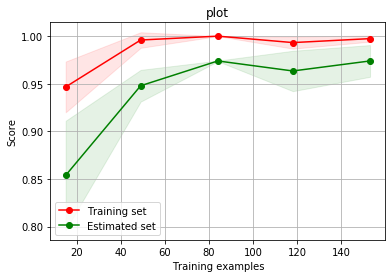

In [85]:
# Кривая обучения для логистической регресии
plot_learning_curve (model, X_test, predicted)

In [82]:
# Метод опорных векторов с линейным ядром (SVC)
from sklearn import svm

clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)

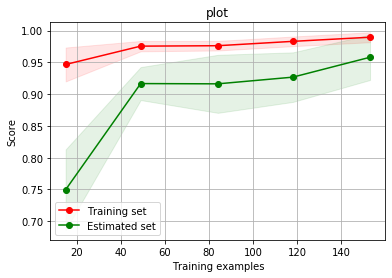

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       121
           1       0.79      0.62      0.69        71

    accuracy                           0.80       192
   macro avg       0.79      0.76      0.77       192
weighted avg       0.80      0.80      0.79       192

[[109  12]
 [ 27  44]]


In [128]:
# Кривая обучения для метода опорных векторов с линейным ядром (SVC)
plot_learning_curve (clf, X_test, y_pred2)
# Метрики
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred2))
print(metrics.confusion_matrix(y_test, y_pred2))
acc2, prec2, rec2 = metrics.accuracy_score(y_test, y_pred2), metrics.precision_score(y_test, y_pred2, average= None), metrics.recall_score(y_test, y_pred2, average= None)

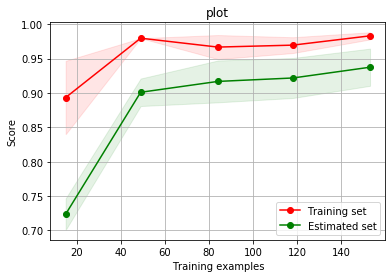

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       121
           1       0.78      0.61      0.68        71

    accuracy                           0.79       192
   macro avg       0.79      0.75      0.76       192
weighted avg       0.79      0.79      0.78       192

[[109  12]
 [ 28  43]]


In [127]:
# Метод опорных векторов с гаусовым ядром (SVC)
from sklearn import svm

clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train, y_train)
y_pred3 = clf.predict(X_test)

# Кривая обучения
plot_learning_curve (clf, X_test, y_pred3)
# Метрики
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred3))
print(metrics.confusion_matrix(y_test, y_pred3))
acc3, prec3, rec3 = metrics.accuracy_score(y_test, y_pred3), metrics.precision_score(y_test, y_pred3, average= None), metrics.recall_score(y_test, y_pred3, average= None)

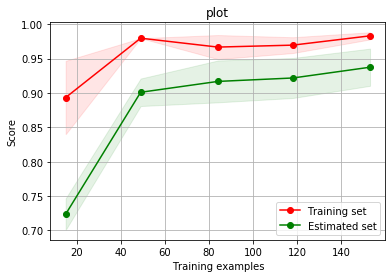

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       121
           1       0.78      0.61      0.68        71

    accuracy                           0.79       192
   macro avg       0.79      0.75      0.76       192
weighted avg       0.79      0.79      0.78       192

[[109  12]
 [ 28  43]]


In [126]:
# Метод k ближайших соседей (KNeighborsClassifier)
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(X_train, y_train)
y_pred4 = clf.predict(X_test)

# Кривая обучения
plot_learning_curve (clf, X_test, y_pred4)
# Метрики
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred4))
print(metrics.confusion_matrix(y_test, y_pred4))
acc4, prec4, rec4 = metrics.accuracy_score(y_test, y_pred4), metrics.precision_score(y_test, y_pred4, average= None), metrics.recall_score(y_test, y_pred4, average= None)

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


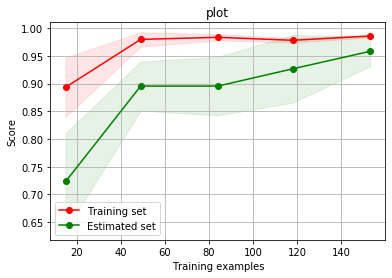

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       121
           1       0.79      0.68      0.73        71

    accuracy                           0.81       192
   macro avg       0.81      0.78      0.79       192
weighted avg       0.81      0.81      0.81       192

[[108  13]
 [ 23  48]]


In [125]:
# Многослойный перцептрон (MLP)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred5 = mlp.predict(X_test)

# Кривая обучения
plot_learning_curve (clf, X_test, y_pred5)
# Метрики
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred5))
print(metrics.confusion_matrix(y_test, y_pred5))
acc5, prec5, rec5 = metrics.accuracy_score(y_test, y_pred5), metrics.precision_score(y_test, y_pred5, average= None), metrics.recall_score(y_test, y_pred5, average= None)

In [172]:
# Cравнение результатов
acc,prec,rec = [],[],[]
acc = [acc1, acc2, acc3, acc4, acc5]
prec= [prec1, prec2, prec3, prec4, prec5]
rec = [rec1, rec2, rec3, rec4, rec5]
precision0, precision1, recall0, recall1 = [], [], [], []
def devide(arr):
    arr1, arr2 = [], []
    for i in range (0, 5):
        arr1.append(arr[i][0])
        arr2.append(arr[i][1])
    return arr1, arr2
precision0, precision1 = devide(prec)  
recall0, recall1 = devide(rec)

best_score= {}
def best(arr):
    best_sc = 0
    best_ind = 5
    for i in range (0, 5):
        if arr[i]>best_sc:
            best_sc = arr[i]
            best_arg = i
    best_score[best_sc] = best_ind

best(acc)
best(precision0)
best(precision1)
best(recall0)
best(recall1)

best_score

{0.8125: 5,
 0.8244274809160306: 5,
 0.7868852459016393: 5,
 0.9008264462809917: 5,
 0.676056338028169: 5}

Самый лучший результат дал последний метод наименьших соседей.

# Контрольные вопросы

- Какие выводы мы можем сделать на основании метрик модели, построенной в данной лабораторной работе?

На основании метрик к каждой модели можно сказать, что все модели показали себя хорошо.

- Чем логистическая регрессия отличается от линейной?

В модели линейной регрессии зависимая переменная считается непрерывной, тогда как в логистической регрессии она является категориальной, т. е. дискретной

- С помощью каких методов происходит оптимизация параметров логистической регрессии?

fit(self, X, y, sample_weight=None)

- Почему метрики достоверности предсказания недостаточно для оценки эффективности модели?

Потому что необходимо понять с какими данными она работала, увидеть как она разграничивает правильное и неправильное

- Что такое метрика F1? Какие еще метрики из этого семейства существуют и для чего они служат?

f1 - гаромническое среднее precision и recall

['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro',
'f1_micro', 'f1_samples', 'f1_weighted', 'log_loss', 'mean_absolute_error',
'mean_squared_error', 'median_absolute_error', 'precision', 'precision_macro',
'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall',
'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']

- Чем метод опорных векторов отличается от логистической регрессии? В чем его достоинства и недостатки?

1 - SVM пытается максимизировать разницу между ближайшими векторами поддержки, а LR - вероятностью апостериорного класса. Таким образом, SVM находит решение, которое является максимально возможным для обеих категорий, в то время как LR не обладает этим свойством

2 - LR более чувствителен к выбросам, чем SVM, потому что функция стоимости LR расходится быстрее

- В чем особенности метода ближайших соседей?


метод решения задач классификации и задач регрессии, основанный на поиске ближайших объектов с известными значения целевой переменной. Метод основан на предположении о том, что близким объектам в признаковом пространстве соответствуют похожие метки.